In [85]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

## EPH survey data

#### Prior probabilities (matrix entries) from survey info

In [223]:
# ENGHO data
df = pd.read_csv('./../resumen_EPH_hogar.csv')
df = df.loc[df.IV1 != 9]
df['IV10'] = df['IV10'].map({1: 1, 2: 2, 3: 2, 0: 0, 9: 9})
df['II9'] = df['II9'].map({1: 1, 2: 2, 3: 2, 4: 4, 0: 0})
df['II7'] = df['II7'].map({1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 6, 8: 6, 9: 6, 0: 6})
df['II8'] = df['II8'].map({1: 1, 2: 2, 3: 3, 4: 4, 0: 4})
df['IX_TOT'] = df['IX_TOT'].clip(0, 8)

In [257]:
qjkl_total = df.groupby(['IV3', 'IV5', 'IV6', 'IV7', 'IV8', 'II8', 'II7', 'IX_TOT'])[['CODUSU']].nunique() # how many IDs with each combination
q_ix = pd.MultiIndex.from_product(qjkl.index.levels, names=qjkl.index.names)

qjkl_total = df.loc[df.AGLOMERADO == 20].groupby(['IV3', 'IV5', 'IV6', 'IV7', 'IV8', 'II8', 'II7', 'IX_TOT'])[['CODUSU']].nunique() # how many IDs with each combination
qjkl /= qjkl.sum()

qjkl = qjkl.reindex(q_ix, fill_value = 0)

qjkl = qjkl.unstack(range(7, 0, -1)).sort_index(axis = 1)
qjkl.shape

(4, 9216)

In [229]:
census_ct = pd.read_csv('./hogares_aglomerados_counts.csv', header = [0, 1]).dropna()
names = census.columns.get_level_values(0).drop_duplicates()[1:]
# totales = census_ct[[('Info', 'HOGARES')]].values


In [83]:
por_aglo = census_ct.groupby(('Info', 'AGLOMERADO')).sum()[names]
por_aglo_prob = por_aglo.div(por_aglo[names[0]]['HOGARES'].values, axis = 0)

In [86]:
por_aglo_prob

Pisos          \
                            LINK HOGARES   
(Info, AGLOMERADO)                         
2                   2.394475e+05     1.0   
3                   2.116932e+05     1.0   
4                   2.683045e+06     1.0   
5                   2.605860e+06     1.0   
6                   1.245261e+06     1.0   
7                   1.914199e+06     1.0   
8                   8.676339e+05     1.0   
9                   1.015669e+06     1.0   
10                  1.871799e+06     1.0   
12                  5.831456e+05     1.0   
13                  5.108339e+05     1.0   
15                  1.314749e+06     1.0   
17                  2.215657e+06     1.0   
18                  3.057316e+06     1.0   
19                  1.359230e+06     1.0   
20                  2.754830e+06     1.0   
22                  3.738989e+05     1.0   
23                  1.937154e+06     1.0   
25                  1.371922e+06     1.0   
26                  2.793767e+06     1.0   
27                  2.556121e+06     1.0   
29                  3.208815e+06     1.0   
30                  1.831197e+06     1.0   
31                  3.556220e+06     1.0   
32                  6.910806e+04     1.0   
33                  2.027635e+05     1.0   
34                  2.637230e+05     1.0   
36                  4.852717e+05     1.0   
38                  7.642098e+05     1.0   
91                  9.338259e+05     1.0   
93                  2.018076e+06     1.0   

                                                                       \
                   1 Mosaico / baldosa / madera / ceramica / alfombra   
(Info, AGLOMERADO)                                                      
2                                                            0.835336   
3                                                            0.932430   
4                                                            0.842894   
5                                                            0.788937   
6                                                            0.856240   
7                                                            0.717151   
8                                                            0.645365   
9                                                            0.896898   
10                                                           0.891550   
12                                                           0.704525   
13                                                           0.864344   
15                                                           0.610971   
17                                                           0.874621   
18                                                           0.759304   
19                                                           0.607361   
20                                                           0.922286   
22                                                           0.745062   
23                                                           0.647576   
25                                                           0.756766   
26                                                           0.859728   
27                                                           0.730632   
29                                                           0.707337   
30                                                           0.921012   
31                                                           0.936191   
32                                                           1.089520   
33                                                           0.744800   
34                                                           0.892802   
36                                                           0.858463   
38                                                           0.814102   
91                                                           0.885539   
93                                                           0.889535   

                                               

In [258]:
df_input = por_aglo_prob.iloc[20]
T = len(names)

margins_s = []
margins_v = []
shape_ = np.zeros(T, dtype = int)

for t in range(T):
    name = names[t]
    margin_series = df_input[name].drop('LINK').drop('HOGARES', errors = 'ignore')
    margins_s += [margin_series]
    margins_v += [margin_series.values]
    shape_[t] = len(margin_series)
    
t1, t2, t3, t4, t5, t6, t7, t8 = tuple([m.values for m in margins_s])
df_ = pd.DataFrame(np.prod(np.ix_(t1, t2, t3, t4, t5, t6, t7, t8)).reshape(qjkl.values.shape), 
                  columns = qjkl.columns, index = qjkl.index)
uncorr_fill_p = df_

uncorr_fill_q = df_ * (qjkl == 0).astype(int)
qjkl = (1 - uncorr_fill_q.sum().sum())*qjkl + uncorr_fill_q

In [264]:
l = np.prod(shape_)
cube = np.arange(l).reshape(shape_)
# cube[:, 2, :].flatten()

In [269]:
## Use the 2D shape of the data frame

In [266]:
from scipy.optimize import minimize
M_0 = qjkl.values#.reshape(8, 3, 4)[0:2]

constraints = []

shape_df = M_0.shape
shape_ #was defined before
l = np.prod(shape_df)
table = np.arange(l).reshape(shape_df)

for dim in range(T):
    cube_tr = cube.transpose(tuple(np.roll(np.arange(T), - (dim)))) 
    marg = margins_v[dim]
    print cube_tr.shape
    print marg
    
    for j in range(shape_[dim]):
        def f(M, cube_tr = cube_tr, marg = marg, j = j):
            return (M.flatten()[cube_tr[j].flatten()]).sum() - marg[j]

        constraints.append(f)
    
cons = [{'type':'eq', 'fun': con} for con in constraints]
cons

def MaxEnt(p, q = M_0.flatten()):
#     p_mat = np.array(p_mat).reshape(q_mat.shape)
    return (p*np.log(p/q)).sum()
    
res = minimize(lambda M: MaxEnt(M), M_0 + 0.001, constraints = cons, options={'maxiter': 1000, 'ftol': 0.01 })

(4, 2, 3, 4, 2, 4, 6, 8)
[ 0.73063236  0.23731272  0.02426192  0.007793  ]
(2, 3, 4, 2, 4, 6, 8, 4)
[ 0.58563745  0.41436255]
(3, 4, 2, 4, 6, 8, 4, 2)
[ 0.93604332  0.05368614  0.01027055]
(4, 2, 4, 6, 8, 4, 2, 3)
[  9.69485662e-01   2.08924566e-02   6.12629170e-04   9.00925250e-03]
(2, 4, 6, 8, 4, 2, 3, 4)
[ 0.97512545  0.02487455]
(4, 6, 8, 4, 2, 3, 4, 2)
[ 0.67833365  0.31700857  0.00176581  0.00289197]
(6, 8, 4, 2, 3, 4, 2, 4)
[ 0.67894628  0.0173338   0.14180563  0.12030055  0.00626143  0.03535231]
(8, 4, 2, 3, 4, 2, 4, 6)
[ 0.11228231  0.18910421  0.19706839  0.20172617  0.14355343  0.08414642
  0.03450544  0.03761363]


MemoryError: 

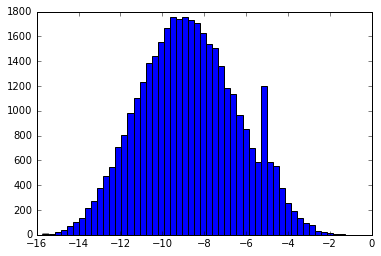

In [278]:
# import matplotlib.pyplot as plt
# %matplotlib inline
plt.hist(np.log10(v), 50)
plt.show()

In [274]:
v = M_0.flatten()

In [274]:
p = pd.DataFrame(res['x'].reshape(qjkl.shape), columns = qjkl.columns, index = qjkl.index)

In [275]:
p.round(5)

CODUSU                                                                 \
IV6        1                                   2                              
IV3        1        2        3        4        1        2        3        4   
IV4                                                                           
1    0.17850  0.00008  0.00015  0.00011  0.00019  0.00019  0.00003  0.00023   
2    0.13920  0.09629  0.00507  0.00208  0.02264  0.03136  0.00496  0.00155   
3    0.08916  0.00189  0.00021  0.00007  0.00018  0.00022  0.00139  0.00006   
4    0.28368  0.04542  0.00188  0.00030  0.00701  0.01664  0.00519  0.00008   
5    0.01876  0.00304  0.00025  0.00022  0.00000  0.00000  0.00001  0.00000   
6    0.00089  0.00062  0.00040  0.00003  0.00000  0.00000  0.00000  0.00000   
7    0.00481  0.00293  0.00054  0.00003  0.00000  0.00000  0.00000  0.00000   
9    0.01036  0.00005  0.00002  0.00009  0.00000  0.00000  0.00000  0.00000   

                                         
IV6        3                             
IV3        1        2        3        4  
IV4                                      
1    0.00015  0.00006  0.00050  0.00071  
2    0.00043  0.00102  0.00023  0.00012  
3    0.00192  0.00023  0.00012  0.00001  
4    0.00034  0.00025  0.00022  0.00003  
5    0.00029  0.00035  0.00119  0.00003  
6    0.00413  0.00045  0.00242  0.00002  
7    0.00489  0.00076  0.00103  0.00001  
9    0.00023  0.00006  0.00004  0.00000

In [17]:
qjkl.round(5)

CODUSU                                                                 \
IV6        1                                   2                              
IV3        1        2        3        4        1        2        3        4   
IV4                                                                           
1    0.26541  0.01281  0.00081  0.00071  0.00086  0.00112  0.00006  0.00009   
2    0.20764  0.02167  0.00029  0.00043  0.00146  0.00233  0.00013  0.00016   
3    0.06976  0.00202  0.00007  0.00012  0.00007  0.00013  0.00023  0.00005   
4    0.24410  0.05471  0.00074  0.00043  0.00274  0.01023  0.00090  0.00004   
5    0.00986  0.00223  0.00006  0.00018  0.00022  0.00035  0.00018  0.00001   
6    0.00052  0.00049  0.00009  0.00003  0.00003  0.00025  0.00021  0.00001   
7    0.00310  0.00257  0.00018  0.00003  0.00012  0.00043  0.00032  0.00001   
9    0.07036  0.00043  0.00001  0.00040  0.00034  0.00009  0.00002  0.00000   

                                         
IV6        3                             
IV3        1        2        3        4  
IV4                                      
1    0.00004  0.00001  0.00010  0.00002  
2    0.00006  0.00024  0.00001  0.00004  
3    0.00161  0.00043  0.00005  0.00001  
4    0.00031  0.00060  0.00010  0.00004  
5    0.00001  0.00003  0.00003  0.00000  
6    0.00015  0.00003  0.00004  0.00000  
7    0.00025  0.00007  0.00003  0.00000  
9    0.00017  0.00004  0.00001  0.00000

In [276]:
result_p_st = p.stack().stack().reset_index()

print result_p_st.groupby('IV6')['CODUSU'].sum()

print result_p_st.groupby('IV4')['CODUSU'].sum()

print result_p_st.groupby('IV3')['CODUSU'].sum()

IV6
1    0.887161
2    0.091963
3    0.022240
Name: CODUSU, dtype: float64
IV4
1    0.180919
2    0.304957
3    0.095481
4    0.361025
5    0.024144
6    0.008970
7    0.015011
9    0.010857
Name: CODUSU, dtype: float64
IV3
1    0.767781
2    0.201914
3    0.025882
4    0.005787
Name: CODUSU, dtype: float64


In [277]:
margins_v

[array([ 0.17928839,  0.30580031,  0.09560977,  0.3615159 ,  0.02412938,
         0.00890009,  0.01495176,  0.0098044 ]),
 array([ 0.88547345,  0.09249319,  0.02203337]),
 array([ 0.76582935,  0.20284505,  0.0258418 ,  0.0054838 ])]

### Shapefiles aglomerados

In [21]:
import geopandas as gpd
import shapely.geometry as geometry


In [135]:
# gdf = gpd.read_file('./../radios_censo_2010_aglos/radios_censo_2010_aglos.shp')
# gdf = gdf.drop('AREA', axis = 1)
# gdf['geometry'] = [geometry.Point(xy) for xy in zip(gdf.X, gdf.Y)]
# gdf.to_file(driver = 'ESRI Shapefile', filename = './aglos_w_centroid.shp')

# g1 = gpd.GeoDataFrame.from_file("aglos_w_centroid.shp")
# g2 = gpd.GeoDataFrame.from_file("./../radios_w_geometry.shp")

merged = g1[['REDCODE','AGLO_EPH', 'geometry']].merge(g2[['LINK', 'PROVINCIA', 'POBLACION_', 'VIVIENDAS_', 'HOGARES', 'geometry']]
                                             , left_on = ['REDCODE'], right_on = ['LINK'])

In [179]:
correccion_AGLOS = { u'0001': 32, #capital CABA
 u'0002': 13, #cordoba
 u'0003': 4, #rosario
 u'0004': 10, #mendoza
 u'0005': 2, #la plata
 u'0006': 29, #tucuman
 u'0007': 34, #mar del plata
 u'0008': 5, #sta fe
 u'0009': 23,# salta
 u'0010': 27,# san juan
 u'0011': 8,# resistencia
 u'0012': 18, #sgo del estero
 u'0013': 12, #corrientes
 u'0014': 3,# bahia blanca
 u'0015': 17, #neuquen
 u'0016': 6, #parana
 u'0017': 7, #posadas
 u'0018': 19, #jujuy
 u'0019': 15, #formosa
 u'0020': 36, #rio cuarto
 u'0021': 22, #catamarca
 u'0022': 9, #cdro rivadavia
 u'0023': 23, #concordia
 u'0024': 38, #san nicolas
 u'0025': 26, #san luis
 u'0026': 25, #la rioja
 u'0029': 30, #santa rosa
 u'0044': 20, # Rio gallegos
 u'0050': 93, #Viedma (patagones ? )
 u'0086': 31, #Ushuaia rio grande
 u'0135': 91, #Rawson - trelew
 u'1000': 33 }#  GBA
merged['AGLOMERADO'] = merged['AGLO_EPH'].map(correccion_AGLOS)


In [173]:
#Poblacion de aglomerados
# merged.groupby('AGLO_EPH')[['POBLACION_', 'VIVIENDAS_', 'HOGARES']].sum()

In [192]:
VIEDMA = merged.loc[merged.AGLOMERADO == 93][['LINK']].rename(columns = {'LINK': 'radio'})

## Ajuste de los radios censales de un aglomerado

In [228]:
VIEDMA['radio'] = VIEDMA['radio'].astype(int)
IV3_censo['radio'] = IV3_censo['radio'].astype(int)

for df in [IV1_censo, IV3_censo, IV4_censo, IV5_censo, IV6_censo,
           IV7_censo, IV8_censo, IV10_censo, IV11_censo, II9_censo, II8_censo, II7_censo, IX_TOT_censo]:
    
    df.iloc[:, 1:-1] = df.iloc[:, 1:-1].div(df['TOTAL'], axis = 0)

/home/miglesia/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [231]:
merged = VIEDMA.merge(IV1_censo.iloc[:, :-1]
                ).merge(IV3_censo.iloc[:, :-1], on = 'radio'
                       ).merge(IV4_censo.iloc[:, :-1], on = 'radio'
                              ).merge(IV5_censo.iloc[:, :-1], on = 'radio'
                                     ).merge(IV6_censo.iloc[:, :-1], on = 'radio')


In [234]:
merged.loc[2].round(2)

radio                                                 6.200705e+08
1 Casa                                                7.500000e-01
2 Departamento                                        2.400000e-01
3 Pieza de inquilinato                                0.000000e+00
4 Pieza en hotel / pensión                            0.000000e+00
5 Local no construido para habitación                 0.000000e+00
6 Otros                                               1.000000e-02
1 Mosaico / baldosa / madera / cerámica / alfombra    9.300000e-01
2 Cemento / ladrillo fijo                             7.000000e-02
3 Ladrillo suelto / tierra                            0.000000e+00
4 Otro                                                0.000000e+00
1 Membrana / cubierta asfáltica                       3.000000e-02
2 Baldosa / losa sin cubierta                         3.000000e-01
3 Pizarra / teja                                      1.300000e-01
4 Chapa de metal sin cubierta                         5.200000

In [240]:
tuple(range(5 - 1, 0, -1))

(4, 3, 2, 1)

In [278]:
info_dfs = [IV1_censo, IV3_censo, IV4_censo, IV5_censo, IV6_censo]
T = len(info_dfs)

qjkl = df.groupby(['IV1', 'IV3', 'IV4', 'IV5', 'IV6'])[['CODUSU']].nunique() # how many IDs with each combination
qjkl /= qjkl.sum()

q_ix = pd.MultiIndex.from_product(qjkl.index.levels, names=qjkl.index.names)
qjkl = qjkl.reindex(q_ix, fill_value = 0)


qjkl = qjkl.unstack(tuple(range(T - 1, 0, -1))).sort_index(axis = 1)

margins_s = []
margins_v = []
shape_ = np.zeros(T, dtype = int)

for t in range(T):
    margin_series = (info_dfs[t].iloc[:, 1:-1].sum()/info_dfs[t].TOTAL.sum())
    margins_s += [margin_series]
    margins_v += [margin_series.values]
    shape_[t] = len(margin_series)
    
a, b, c, d, e = tuple([m.values for m in margins_s])
df_ = pd.DataFrame(np.prod(np.ix_(a, b, c, d, e)).reshape(qjkl.values.shape), 
                  columns = qjkl.columns, index = qjkl.index)
uncorr_fill_p = df_

uncorr_fill_q = df_ * (qjkl == 0).astype(int)
qjkl = (1 - uncorr_fill_q.sum().sum())*qjkl + uncorr_fill_q

In [279]:
qjkl

CODUSU                                                              \
IV6         1                                                               
IV5         1                                                               
IV4         1                                       2                       
IV3         1         2         3         4         1         2         3   
IV1                                                                         
1    0.139825  0.005215  0.000366  0.000293  0.099717  0.007869  0.000063   
2    0.035374  0.000805  0.000063  0.000167  0.033546  0.000899  0.028428   
3    0.000449  0.000115  0.000031  0.000165  0.000314  0.000031  0.000736   
4    0.000303  0.000073  0.000021  0.000055  0.000251  0.000042  0.000248   
5    0.000021  0.000012  0.000003  0.000045  0.000042  0.000001  0.000200   
6    0.000052  0.000312  0.000074  0.001139  0.000052  0.000010  0.005094   

                                       ...                                   \
IV6                                    ...                  3                 
IV5                                    ...                  2                 
IV4                   3                ...                  6                 
IV3         4         1         2      ...                  3             4   
IV1                                    ...                                    
1    0.000188  0.043202  0.001066      ...       3.135094e-05  1.540872e-05   
2    0.000094  0.003877  0.000052      ...       2.476574e-07  3.795164e-06   
3    0.000077  0.000021  0.000010      ...       6.415536e-09  9.831328e-08   
4    0.000026  0.000010  0.000094      ...       2.158741e-09  3.308108e-08   
5    0.000021  0.000005  0.000076      ...       1.739054e-09  2.664970e-08   
6    0.000532  0.000127  0.001942      ...       4.437840e-08  6.800656e-07   

                                                                           \
IV6                                                                         
IV5                                                                         
IV4             7                                                       9   
IV3             1             2             3             4             1   
IV1                                                                         
1    1.609537e-06  3.834176e-07  1.045031e-05  2.767866e-06  6.593503e-07   
2    3.964284e-07  9.443563e-08  6.526415e-06  6.817245e-07  1.623978e-07   
3    1.026943e-08  2.446344e-09  1.690660e-07  1.765999e-08  4.206895e-09   
4    3.455524e-09  8.231615e-10  5.688842e-08  5.942347e-09  1.415563e-09   
5    2.783726e-09  6.631284e-10  4.582858e-08  4.787079e-09  1.140359e-09   
6    7.103706e-08  1.692217e-08  1.045031e-05  1.221600e-07  2.910049e-08   

                                               
IV6                                            
IV5                                            
IV4                                            
IV3             2             3             4  
IV1                                            
1    1.010405e-05  1.055430e-06  2.514205e-07  
2    2.488624e-06  2.599522e-07  6.192480e-08  
3    6.446751e-08  6.734031e-09  1.604155e-09  
4    2.169244e-08  2.265910e-09  5.397762e-10  
5    1.747515e-08  1.825388e-09  4.348368e-10  
6    4.459432e-07  4.658153e-08  1.109647e-08  

[6 rows x 192 columns]

### Lagrangian approach

In [ ]:
# def L(x, q_mat, margins):
#     shape = np.array(q_mat.shape)
#     len_a = shape.sum()
#     p_mat = np.array(x[:-len_a]).reshape(shape)
#     a = np.array(x[-len_a:])
    
#     if np.random.rand() < 0.0001:
#         print p_mat
#         print a

#     MaxEnt = (p_mat*np.log(p_mat/q_mat))
    
#     a_ix = np.insert(shape.cumsum(), [0], 0)
    
#     lambda_terms = np.zeros(len(shape))
#     for dim in range(len(shape)):
#         lambda_terms[dim] = np.dot(a[a_ix[dim]:a_ix[dim + 1]], 
#                                    margins[dim].values - p_mat.sum(axis = tuple([i for i in range(len(shape)) if i != dim])))

#     return MaxEnt.sum() + lambda_terms.sum()